<center>
<img src="images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.



# <center> Análisis de datos y visualización en  Python
## <center>Parte 1. Visualización: desde distribuciones simples a multivariadas

En el campo de Aprendizaje automatico, *visualización de los datos* no es solo realizar gráficos lindos para reportes; sus métodos son usados extensivamente en el día a día, en todas las áreas de los proyectos.

Para comenzar, comentamos que  la visualización de los datos es la primera cosa que se realiza cuando se comienza un nuevo proyecto. Se hacen chequeos preliminares y análisis  usando gráficos y tablas para resumir los datos y dejar afuera los detalles menos importantes. La busqueda de aspectos importantes de los datos  es mas conveniente de esta forma que leer muchas lineas de código.  

### Outline de clase

1. [Dataset](#1.-Dataset)
2. [Visualizacion Univariada](#2.-Visualizacion-Univariada)
    * 2.1 [Variables cuantitativas](#2.1-Variables-cuantitativas)
    * 2.2 [Variables binarias y categoricas](#2.2-Variables-binarias-y-categoricas)
3. [Visualización Multivariada](#3.-Visualización-Multivariada)
    * 3.1 [Cuantitativa vs. Cuantitativa](#3.1-Cuantitativa-vs.-Cuantitativa)
    * 3.2 [Cuantitativa vs. Categorica](#3.2-Cuantitativa-vs.-Categorica)
    * 3.3 [Categorica vs. Categorica](#3.3-Categorica-vs.-Categorica)
4. [Ejercicio](#4.-Ejercicio)
5. [Recursos útiles](#5.-Recursos-útiles)

## 1. Dataset

Inicializaciones de entorno:

In [1]:
import numpy as np
import pandas as pd

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

Seguimos trabajando con los datos de lealtad de un operador telecom. Cargamos los datos en un  `DataFrame`:

In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')
# /media/juniordavid/JUAN/Documents/posgrado/FaMAF/ml/data

In [3]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Esta es una descripción de las variables

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

La última columna, **Churn**, el la variable objetivo. Es binaria: *True* indica que la compania eventualmente perdio el cliente, y *False* indica que el cliente se retuvo. 

## 2. Visualizacion Univariada

Estudiamos de a una las variables del dataset. 

#### 2.1 Variables cuantitativas

*Variables cuantitativas* toman valores ordenados ya sea continuos o discretos y usualmente representan una medición.

##### Histogramas y gráficos de densidad

Para mirar la distribución de la variable usamos su *histograma* con el metodo  [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html) de Pandas.

En este gráfico vemos que la variable *Total day minutes* tiene forma acampanada, mientras que *Total intl calls* esta sesgada hacia la derecha.

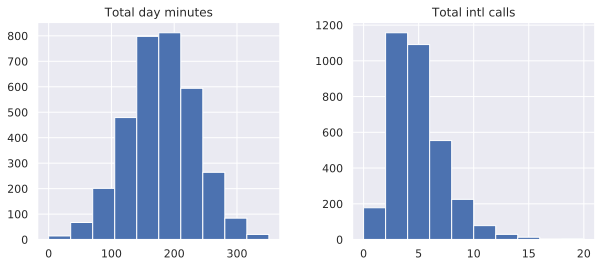

In [4]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4));

Los  *density plots* construidos con un estimador de kernel, *Kernel Density Plots* son una version suavizada de los histogramas. 

Su mayor ventaja es que no dependen del tamaño de los intervalos, son adaptativos. 

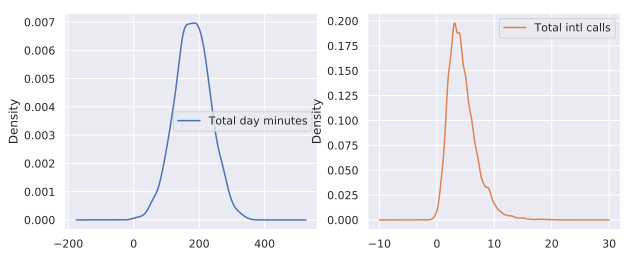

In [5]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

El paquete  `seaborn` tiene gráficos especiales para distribuciones [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). 

Por ejemplo, al graficar la distribucion del  *Total day minutes*  se grafica el histograma y su [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) sobre él.

El alto del histograma muestra la frecuencia, no el número de ejemplos en cada intervalo. 


/home/juniordavid/anaconda3/envs/datascience/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juniordavid/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/juniordavid/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/hom

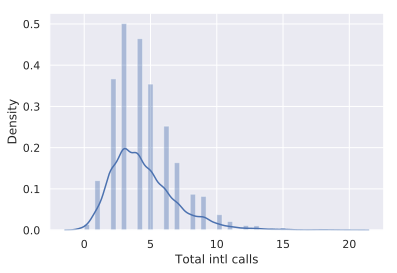

In [6]:
sns.distplot(df['Total intl calls']);


##### Box plot

Otro gráfico interesante es el  *box plot*. Los outliers se marcan individualmente, y puede notarse que no hay números altos de llamadas internacionales. 

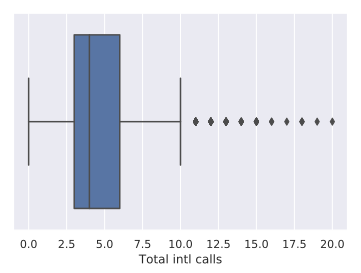

In [7]:
sns.boxplot(x='Total intl calls', data=df);

##### Gráfico de violin

Otro gráfico interesante es el de violín, que se forma colocando la densidad estimada mediante KDE en ambos lados del centro.  


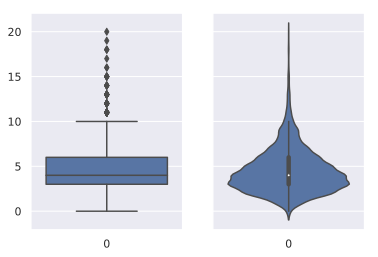

In [8]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

La diferencia entre el box plot y el gráfico de violín es que el primero ilustra los estadísticos centrales de la distribución, mientras que el segundo se concentra en una versión suavizada de la distribución en su conjunto. 

En este caso el gráfico de violin no agrega mayor información a la presentada en el boxplot. 



#### 2.2 Variables binarias y categoricas

*Variables categóricas* toman un número fijo de valores. Cada uno de esos valores asigna una observacion a un grupo correspondiente llamado  *categoría*, el cual refleja alguna propiedad cualitativa de la observación. Variables *Binarias*  son un caso especial de las variables categoricas pues  tienen solo dos categorías. Si los valores de una variable categórica están ordenados, se la llama *ordinal*.

##### Tabla de frecuencias 

Estudiemos cuan balanceadas son las clases presentes en nuestra variable objetivo *churn rate* creando una tabla de frecuencias, que muestra la frecuencia de cada valor de la variable.

In [9]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Las entradas de la tabla estan ordenadas del valor mas frecuente al menos frecuente.

En nuestro caso, los datos no estan balanceados, esto es, las dos clases observadas, clientes leales y no leales, no estan representados igualmente en el dataset.  Solo una pequeña parte de los clientes cancelaron su subscripción la servicio  telefonico.  Como nuestro objetivo infertencial es entender como se comportan los consumidores desleales, esto implica que deben agregarse algunas  restricciones en la medición del desempeño del clasificador, moderando los errores. 

##### Bar plot

El gráfico de barras es una representacion gráfica del la tabla de frecuencias.   La forma más fácil de de crearla es utilizar la función  de  `seaborn` [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). Hay otra función en `seaborn` con un nombre muy confuso, [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) que se utiliza para representar la tendencia central de una variable continua condicionada por una variable categórica, junto con barras de error. Para estudiar la distribución de la variable continua, el histograma o el boxplot son mucho mejores. 

Seleccionemos dos variables discretas de nuestro dataset. La primera es categórica y la seguna ordinal.  

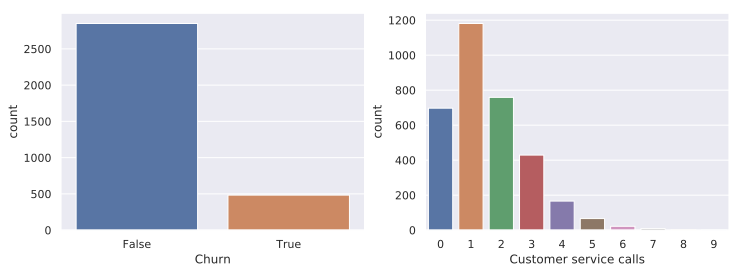

In [10]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

Mientras los histogramas, discutidos arriba, y los bar plots pueden resultar similares, hay varias diferencias entr ellos:

1. *Histogramas* son estimadores de la densidad de una variable continua, mientras que los  *bar plots* describen el conteo de variables discretas.
2. Los valores del eje X del *histograma* son reales; en un *bar plot* se pueden tener cualquier tipo de valores en el eje X: números (variable ordinal), nombres o booleanos (variables categóricas).
3. En el *histograma*, las barras son ubicadas sobre el centro del intervalo donde se realiza el conteo, y su altura depende de dicho conteo. Si las variables son *ordinales*, esto mismo ocurre en el barplot. En cambio para variables categóricas, el orden de las barras depende sólo del orden en que las categorías han sido ingresadas en el dataset.



El gráfico arriba da una idea del desbalance de la variable objetivo *Churn*.El bar plot para *Customer service calls* de la derecha dá una idea de que la mayoría de los consumidores resuelve sus problemas  en un maximo de 2–3 llamadas. Pero como nosotros queremos ser capaces de predecir la clase minoritaria, estamos mas interesados en  caracterizar el comportamiento de los pocos clientes descontentos.Puede ser que la cola del bar plot contenga la mayoría de ellos. 

## 3. Visualización Multivariada

Gráficos *Multivariados* nos permiten ver la relación entre dos o más variables, todo en una misma figura. Como en los gráficos univariados, el tipo específico de visualización depende de los tipos de variables analizadas.

#### 3.1 Cuantitativa vs. Cuantitativa

##### Matrix de Correlación

Miremos las correlaciones entre las variables numéricas de nuestro dataset. Esta información es importante para saber qué algoritmos pueden ser perjudicados por la información redundante, y qué opciones se tienen para explotar positivamente estas estructuras. 

Primero, wusamos el método [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) de pandas en un  `DataFrame` que calcula la correlacion entre cada par de variables.Luego se pasa *correlation matrix* resultante a un  [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de `seaborn`, el cual arma una matriz codificada por colores con los valores provistos. 

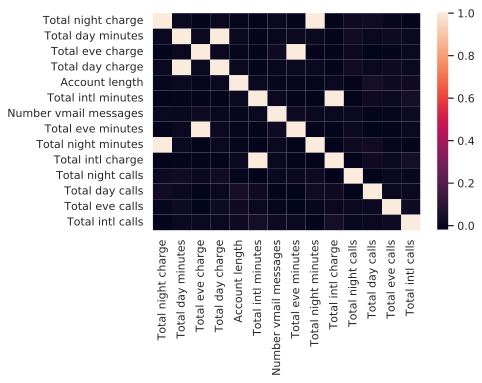

In [11]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

A partir de la matriz de correlación coloreada generada anteriormente, podemos ver que hay 4 variables como *Total day charge* que se han calculado directamente a partir del número de minutos dedicados a las llamadas telefónicas (*Total day minutes*). Estas variables se llaman variables *dependientes* y, por lo tanto, pueden omitirse ya que no aportan ninguna información adicional. Vamos a deshacernos de ellas:

In [12]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

##### Gráfico de dispersión (Scatterplot)

 El *diagrama de dispersión* muestra los valores de dos variables numéricas como *coordenadas cartesianas* en el espacio 2D. Los diagramas de dispersión en 3D también son posibles.

Probemos la función [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) de la librería `matplotlib`:

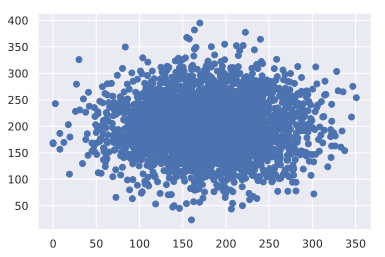

In [13]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

Obtenemos una imagen poco interesante de dos variables normalmente distribuidas. Además, parece que estas características no están correlacionadas porque la forma de elipse está alineada con los ejes.

Hay una opción un poco más elegante para crear un diagrama de dispersión con la librería `seaborn` :

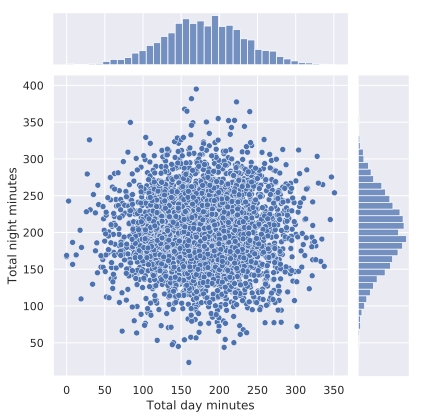

In [14]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

Notemos que la forma de elipse desapareció... eso es porque los ejes de la primer figura no tenían igual escala. Seaborn automáticamente escala la figura en forma correcta. 

La función [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) 
traza dos histogramas que pueden ser útiles en algunos casos.

Usando la misma función, también podemos obtener una versión suavizada de nuestra distribución bivariada:

/home/juniordavid/anaconda3/envs/datascience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/juniordavid/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/juniordavid/anaconda3/envs/datascience/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/juniordavid/anaconda3/envs/d

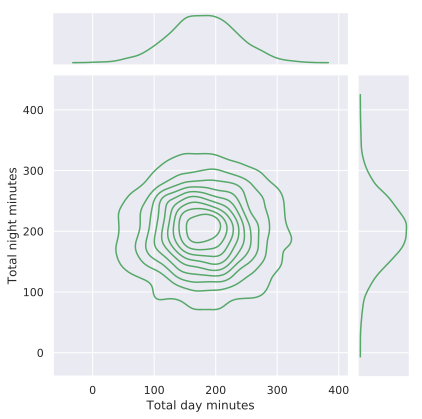

In [15]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");


Esto es básicamente una versión bivariada del * Kernel Density Plot * discutido anteriormente.

##### Scatterplot matrix

En algunos casos, es posible que queramos trazar una * matriz de diagramas de dispersión * como la que se muestra a continuación. Su diagonal contiene las distribuciones de las variables correspondientes, y los gráficos de dispersión para cada par de variables llenan el resto de la matriz.

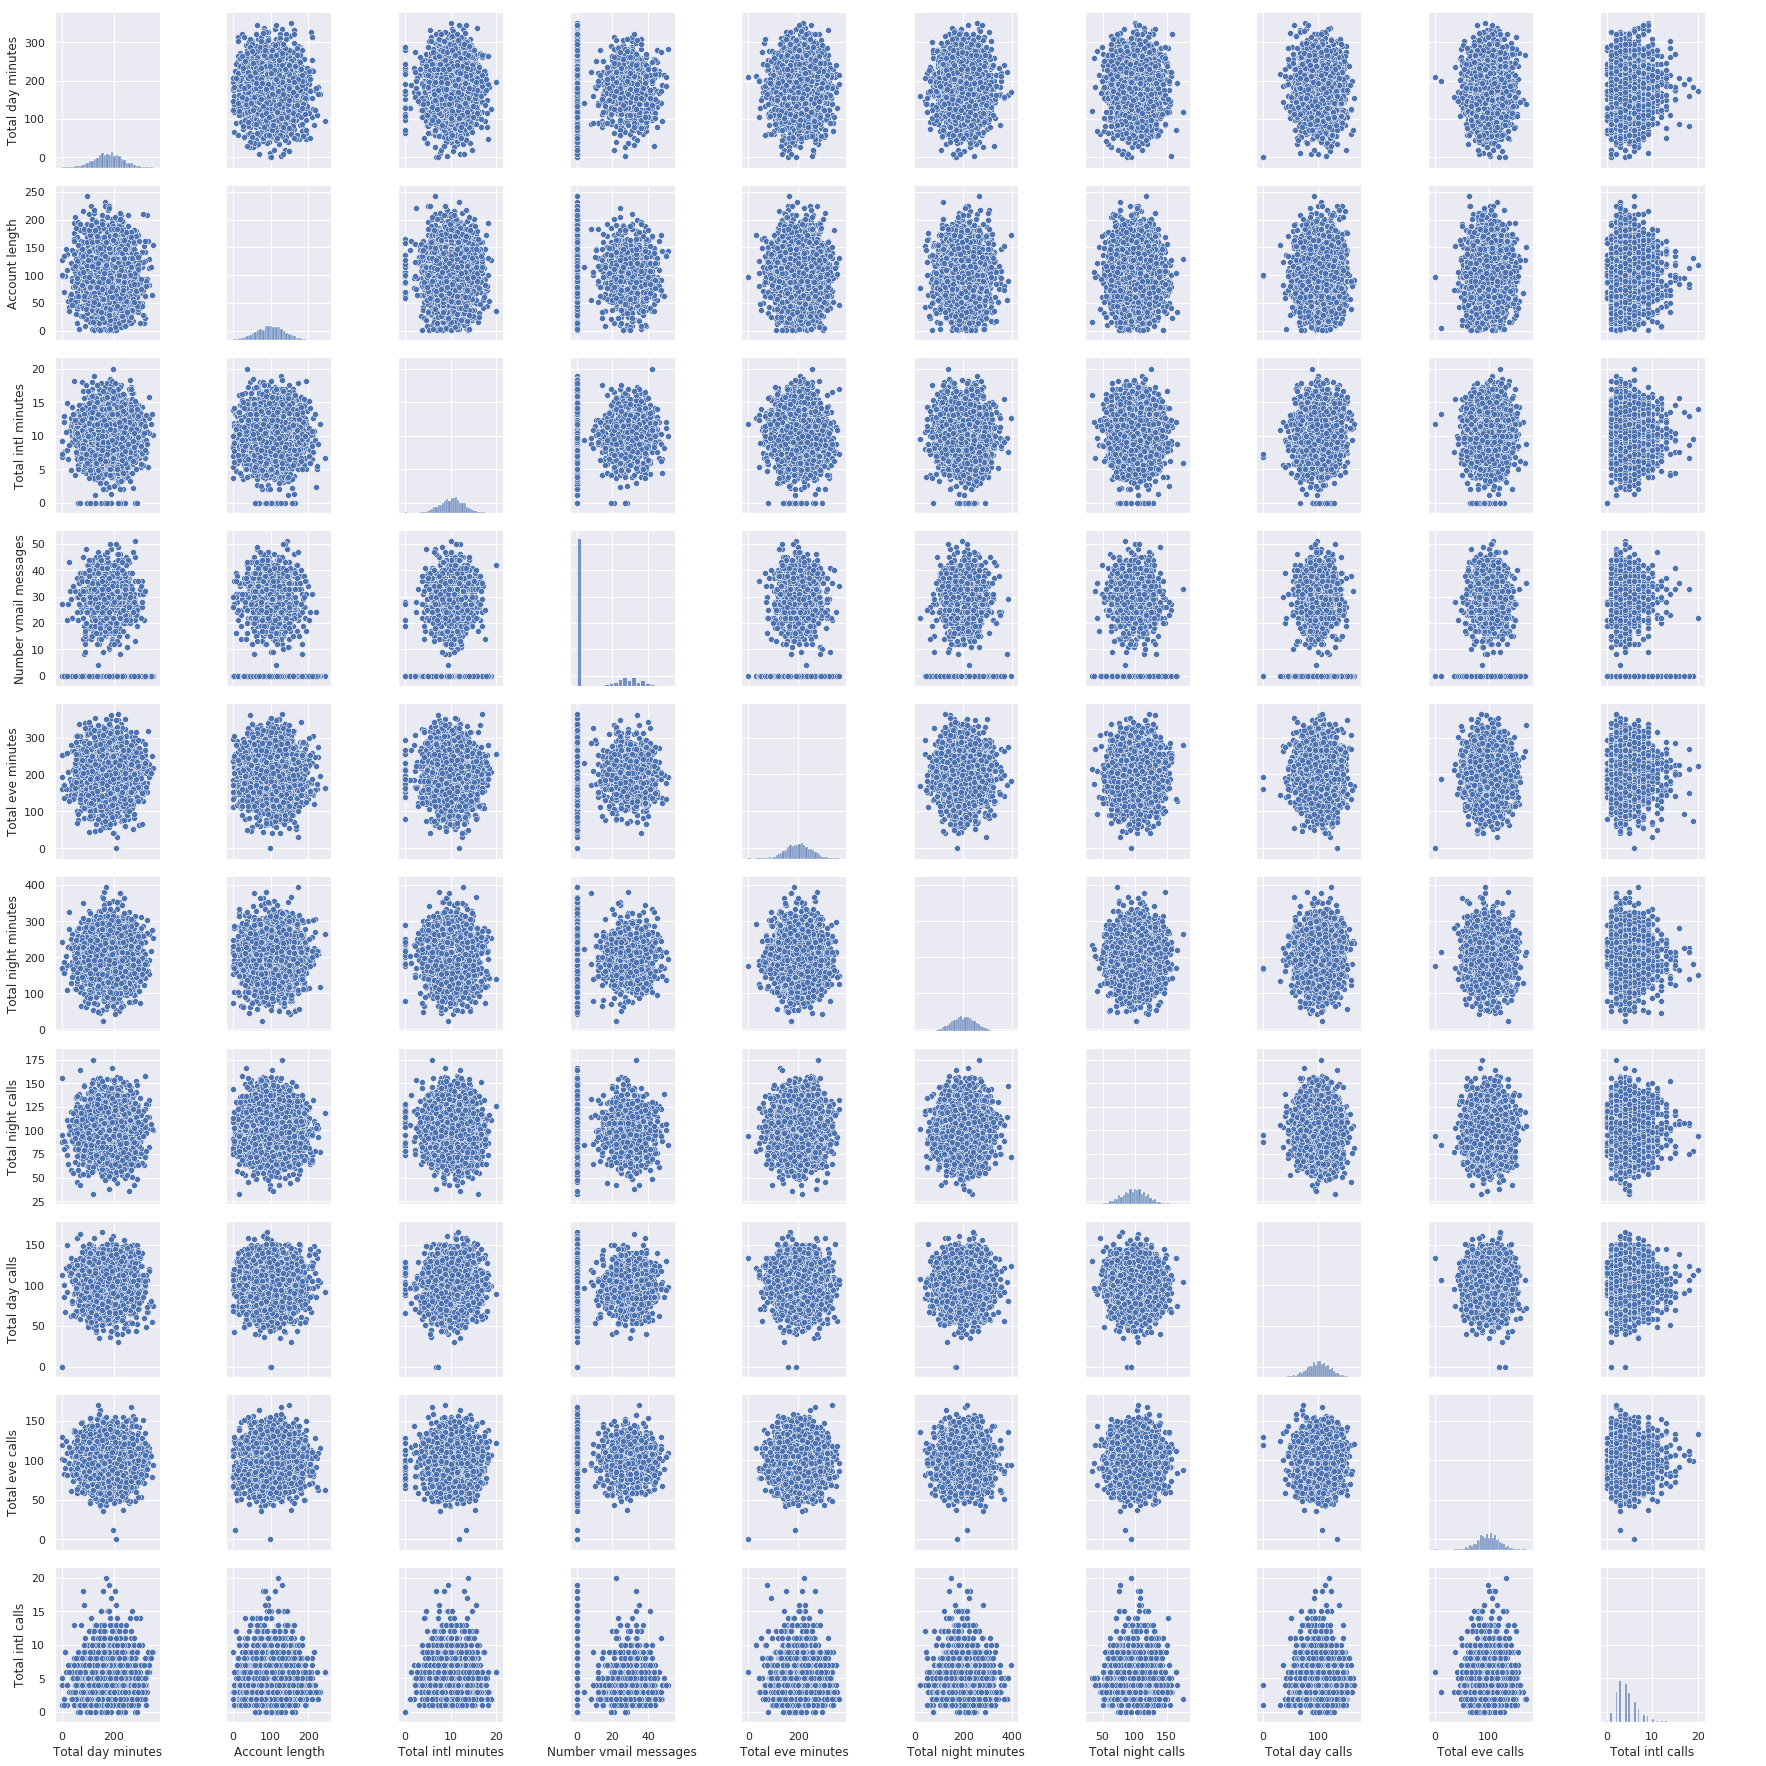

In [16]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [17]:
%config InlineBackend.figure_format = 'svg'

A veces, tal visualización puede ayudar a sacar conclusiones sobre los datos; pero, en este caso, todo está bastante claro sin sorpresas.

#### 3.2 Cuantitativa vs. Categorica

En esta sección, haremos que nuestras gráficas cuantitativas simples sean un poco más emocionantes. Intentaremos obtener nuevas ideas para la predicción de abandono a partir de las interacciones entre las características numéricas y categóricas.

Más específicamente, veamos cómo las variables de entrada están relacionadas con la variable objetivo Churn.

Anteriormente, aprendimos sobre diagramas de dispersión bivariados.Ahora vamos a ver que sus puntos pueden estar codificados por color o por tamaño para que los valores de una tercera variable categórica también se presenten en la misma figura. Podemos lograr esto con la función `scatter ()` vista anteriormente, pero, intentemos una nueva función llamada [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) y usaremos el parámetro 'hue' para indicar nuestra característica categórica de interés:

/home/juniordavid/anaconda3/envs/datascience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


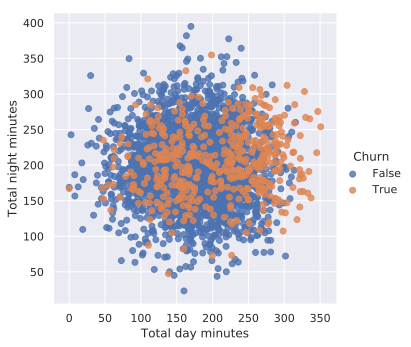

In [18]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

Parece que nuestra pequeña proporción de clientes desleales se inclina hacia la esquina superior derecha; es decir, dichos clientes tienden a pasar más tiempo al teléfono durante el día y la noche. Pero esto no está del todo claro, y no sacaremos conclusiones definitivas de este gráfico.

Ahora, creemos diagramas de caja para visualizar las estadísticas de distribución de las variables numéricas en dos grupos disjuntos: los clientes leales (`Churn = False`) y los que se fueron (` Churn = True`).

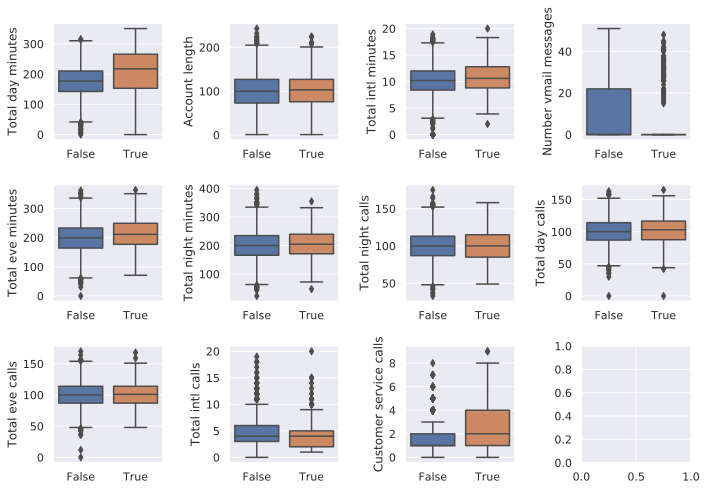

In [19]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

A partir de este gráfico, podemos ver que la mayor discrepancia en la distribución entre los dos grupos es para tres variables: *Total day minutes*, *Customer service calls*, and *Number vmail messages*. Más adelante en este curso, aprenderemos cómo determinar la importancia de las características en la clasificación usando * Random Forest * o * Gradient Boosting *; allí, veremos que las dos primeras características son realmente muy importantes para la predicción de abandono.

Echemos un vistazo a la distribución de minutos del día hablados para los clientes leales y desleales por separado. Crearemos diagramas de caja y violín para *Total day minutes* agrupados por la variable objetivo.

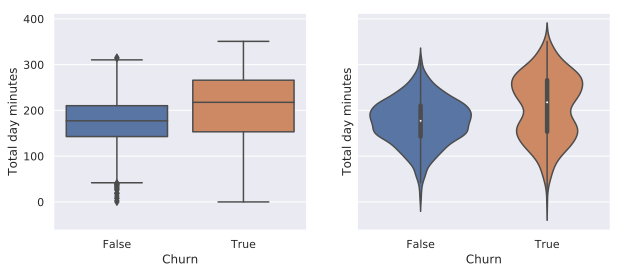

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

En este caso, el violin plot no aporta ninguna información adicional sobre nuestros datos, ya que todo está claro solo en boxplot: los clientes desleales tienden a hablar más por teléfono.

**Una observación interesante**: en promedio, los clientes que suspenden sus contratos son usuarios más activos de los servicios de comunicación. Tal vez no están contentos con las tarifas, por lo que una posible medida para evitar el abandono podría ser una reducción en las tarifas de llamadas. La empresa deberá realizar análisis económicos adicionales para determinar si tales medidas serían beneficiosas.

Cuando sea necesario analizar una variable cuantitativa en dos dimensiones categóricas a la vez, hay una función adecuada para esto en la librería `seaborn` llamada  [`catplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html). Por ejemplo, visualicemos la interacción entre *Total day minutes* y dos variables categóricas en la misma gráfica:

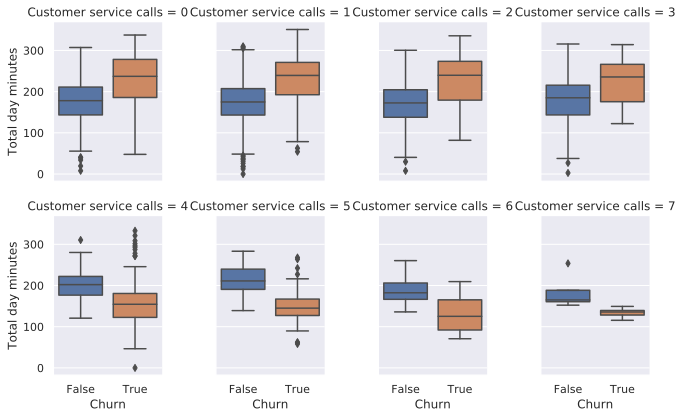

In [21]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

A partir de esto, podríamos concluir que, comenzando con 4 llamadas, *Total day minutes* puede que ya no sea el factor principal para la pérdida de clientes. Quizás, además de nuestra conjetura anterior sobre las tarifas, hay clientes que no están satisfechos con el servicio debido a otros problemas, lo que podría conducir a una menor cantidad de minutos de tiempo en llamadas.

#### 3.3 Categorica vs. Categorica

As we saw earlier in this article, the variable *Customer service calls* has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a *count plot*. Now, we are interested in the relationship between this ordinal feature and the target variable *Churn*.

Let's look at the distribution of the number of calls to customer service, again using a *count plot*. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

Como vimos anteriormente, la variable *Customer service calls* toma algunos pocos valores y, por lo tanto, puede considerarse categórica ordinal. Ya hemos visto su distribución con un *count plot*. Ahora, estamos interesados en la relación entre esta característica ordinal y la variable objetivo * Churn *.

Echemos un vistazo a la distribución de la cantidad de llamadas al servicio al cliente, nuevamente usando un *count plot*. Esta vez, también pasemos el parámetro `hue=Churn` que agrega una dimensión categórica al gráfico:

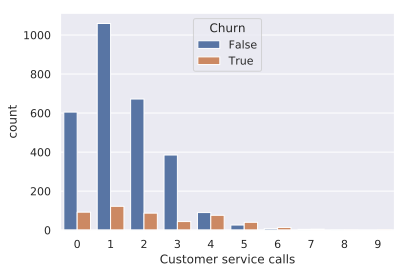

In [22]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);



**Una observación**: la tasa de churn aumenta significativamente después de 4 o más llamadas al servicio al cliente.

Ahora, veamos la relación entre *Churn* y las características binarias, *International plan* y *Voice mail plan*.

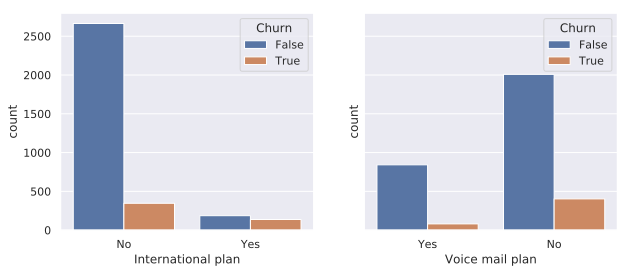

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);



**Una observación**: cuando *International Plan*  está habilitado, la tasa de churn es mucho más alta; el uso del plan internacional por parte del cliente es una característica importante. No observamos el mismo efecto con *Voice mail plan*.

##### Tabla de contingencia

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a *contingency table*, also called a *cross tabulation*. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how *Churn* is related to the categorical variable *State* by creating a cross tabulation:

Además de utilizar medios gráficos para el análisis categórico, existe una herramienta tradicional en estadística: la *tabla de contingencia*, también llamada *tabulación cruzada*. Muestra una distribución de frecuencia multivariada de variables categóricas en forma tabular. En particular, nos permite ver la distribución de una variable condicional sobre la otra mirando a lo largo de una columna o fila.

Intentemos ver cómo  *Churn* está relacionado con la variable categórica *State* creando una tabulación cruzada:

In [24]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]



En el caso de *State*, el número de valores distintos es bastante alto: 51. Vemos que solo hay unos pocos datos disponibles para cada estado individual: solo de 3 a 17 clientes en cada estado abandonaron el operador. Ignoremos eso por un segundo y calculemos la tasa de churn para cada estado, ordenándola de mayor a menor:

In [25]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

At first glance, it seems that the churn rate in *New Jersey* and *California* are above 25% and less than 6% for Hawaii and Alaska. However, these conclusions are based on too few examples, and our observation could be a mere property of our particular dataset. We can confirm this with the [Matthews](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) and [Cramer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) correlation hypotheses, but this would be beyond the scope of this article.

A primera vista, parece que la tasa de churn en *New Jersey* y *California*  está por encima del 25% y menos del 6% en *Hawai* y *Alaska*. Sin embargo, estas conclusiones se basan en muy pocos ejemplos, y nuestra observación podría ser una mera propiedad de nuestro conjunto de datos en particular.

## 4. Ejercicio

Para practica de visual data analysis se debe completar [este Problema](Ejercicio01_pandas_uci_adult.ipynb) donde se analizan variables sobre los pasajeros del Titanic, para su entrega posterior.

## 5. Recursos útiles

- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
